# EDA project - BlinkIt Grocery 
 1. Columns Breakdown
 2. Cleaning & Preprocessing
 3. Exploratory Data Analysis (EDA)
     * i. Missing value treatment
     * ii. Univariate analysis (distribution of individual columns)
     * iii. Bivariate analysis (Sales vs other columns)
     * iv. Correlation heatmap
     v. Business Insights
 4. Business Takeaways:

### Columns Breakdown:
 1. Item Fat Content: Whether the product is "Regular" or "Low Fat"
 2. Item Identifier: Unique ID for each item
 3. Item Type: Product categories (e.g., Frozen Foods, Dairy)
 4. Outlet Establishment Year: Year the store was opened
 5. Outlet Identifier: Unique outlet ID
 6. Outlet Location Type: Tier classification (Tier 1/2/3)
 7. Outlet Size: Store size (Small/Medium/High)
 8. Outlet Type: Type of store (e.g., Supermarket Type1)
 9. Item Visibility: % visibility of product in the outlet
 10. Item Weight: Product weight (some missing values!)
 11. Sales: Our target variable = Product sales
 12. Rating: Customer rating for products (1 to 5 stars)

# 1.Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## 1.2 Load data 

In [2]:
path=r'C:\Users\Utkarsh Bachhav\Downloads\OneDrive\Desktop\Python\Python project\BlinkIT Grocery Data.xlsx'
data=pd.read_excel(path) 

## 1.3 Viewing / inspecting data

In [4]:
data.shape # shows the number of rows and columns

(8523, 12)

In [5]:
data.info() # index , data type and memory information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
print(data.columns) #show's all column

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')


In [7]:
data.head() # shows n rows of data frame 

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [8]:
data.tail() # show last n rows of data frame

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [9]:
data.describe() # shows descriptive staticstics of a dataframe or series

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [10]:
# Ex:- Example of describe 
total_sales = data['Sales'].describe() 
print(total_sales)

count    8523.000000
mean      140.992783
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Sales, dtype: float64


## 1.4 Data cleaning

In [11]:
data.isnull() # only gives output in boolean form

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,True,False,False
8519,False,False,False,False,False,False,False,False,False,True,False,False
8520,False,False,False,False,False,False,False,False,False,True,False,False
8521,False,False,False,False,False,False,False,False,False,True,False,False


In [12]:
# Gives total number of null values in every column 
missing_values_count=data.isnull().sum() 
print(missing_values_count)

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


In [26]:
## Fix and standarize categorize data means proper lower case uppercase and fullform 
data['Item Fat Content'] = data['Item Fat Content'].str.lower().replace({
    'regular':'Regular','low fat':'Low Fat'
})

In [ ]:
data['Item Fat Content'].unique() # correction of data

array(['Regular', 'Low Fat'], dtype=object)

# 2. Univariant Analysis

## 2.1 Item type bar plot 

<Axes: xlabel='Sales', ylabel='Count'>

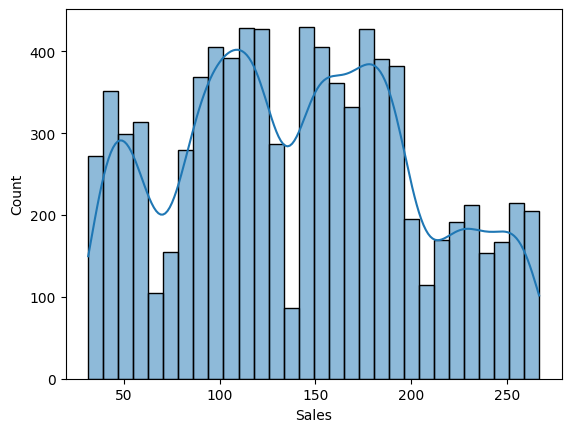

In [27]:
sns.histplot(data['Sales'],bins=30,kde=True)

## 2.2 Histogram of Item weight, sales, and rating

<Axes: xlabel='Outlet Size', ylabel='count'>

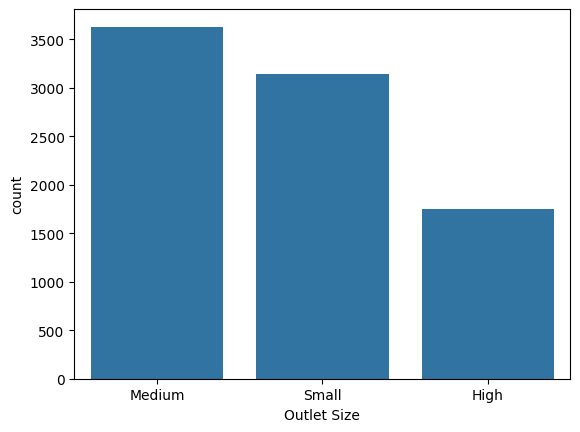

In [30]:
 sns.countplot(x='Outlet Size',data=data)

# 3. Bivariate Analysis

## 3.1 Sales vs Item type 


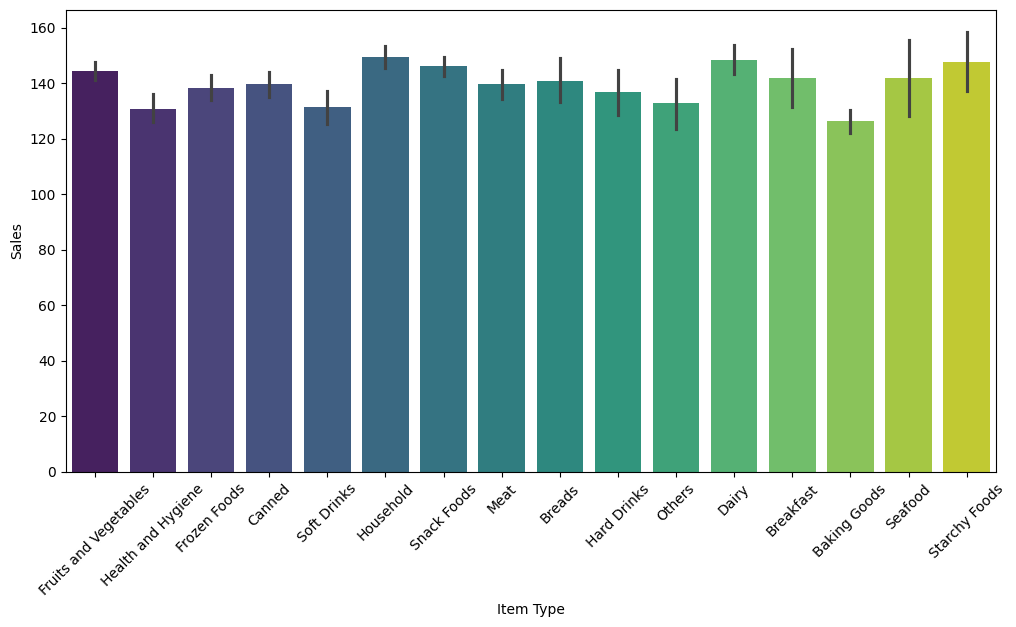

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='Item Type',y='Sales', data=data, palette='viridis')
plt.xticks(rotation = 45)
plt.show()

## 3.2 Sales vs oultet type

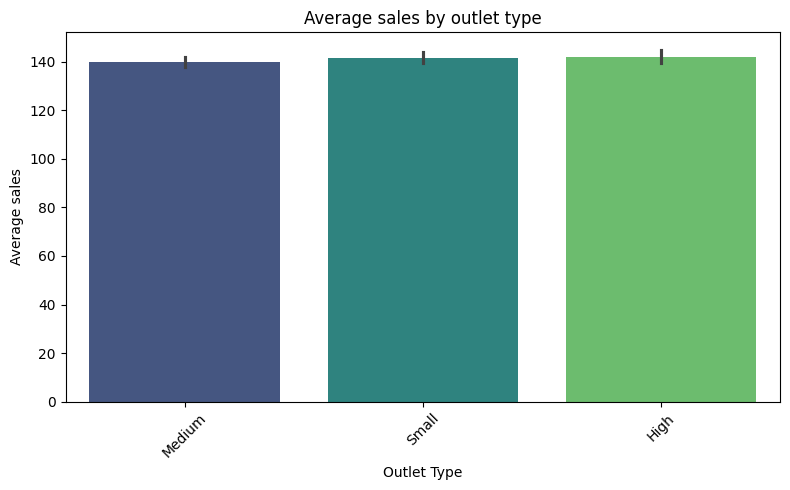

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet Size',y='Sales', data=data, estimator='mean', palette='viridis')
plt.xticks(rotation=45)
plt.title('Average sales by outlet type')
plt.ylabel('Average sales')
plt.xlabel('Outlet Type')
plt.tight_layout()
plt.show() 

# 4. Aggregation Analysis

## 4.1 Yearly sales 

In [15]:
yearly_sales= data.groupby('Outlet Establishment Year')['Sales'].sum().reset_index() 
print('Year vs Sales\n',yearly_sales)

Year vs Sales
    Outlet Establishment Year        Sales
0                       2011   78131.5666
1                       2012  130476.8598
2                       2014  131809.0156
3                       2015  130942.7802
4                       2016  132113.3698
5                       2017  133103.9070
6                       2018  204522.2570
7                       2020  129103.9604
8                       2022  131477.7764


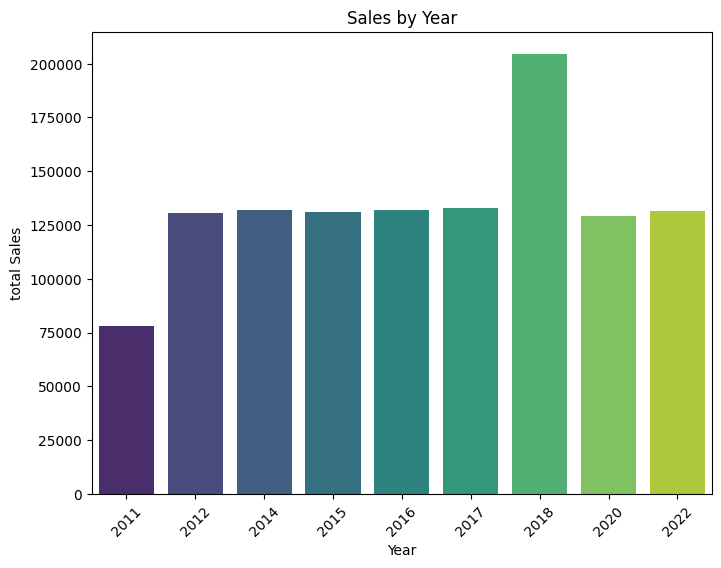

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(data=yearly_sales, x='Outlet Establishment Year', y='Sales', palette='viridis')
plt.xticks(rotation = 45)
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('total Sales')
plt.show() 

## 4.2 Sales by outlet type

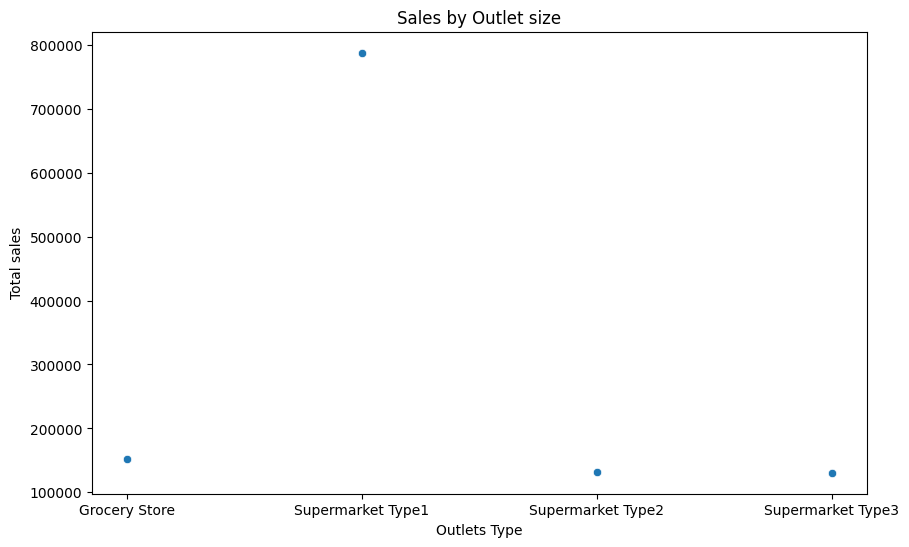

In [22]:
plt.figure(figsize=(10,6))
Sales_by_outlet_type=data.groupby('Outlet Type')['Sales'].sum().reset_index()  
sns.scatterplot(data=Sales_by_outlet_type, x='Outlet Type', y='Sales', palette='viridis')
plt.title('Sales by Outlet size')
plt.xlabel('Outlets Type')
plt.ylabel('Total sales')
plt.show()

## 4.3 Total sales by item type 

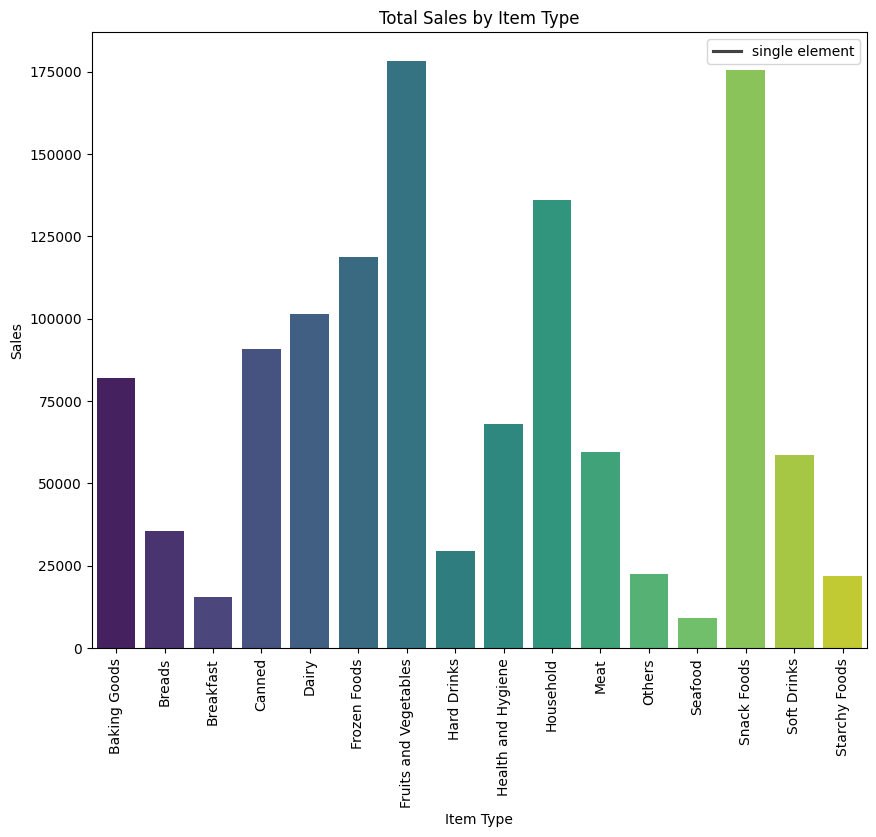

In [24]:
plt.figure(figsize=(10,8))
total_sales = data.groupby('Item Type')['Sales'].sum().reset_index()
sns.barplot(data=total_sales, x='Item Type', y='Sales', palette='viridis')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=90)
plt.legend(['single element']) 
plt.show() 

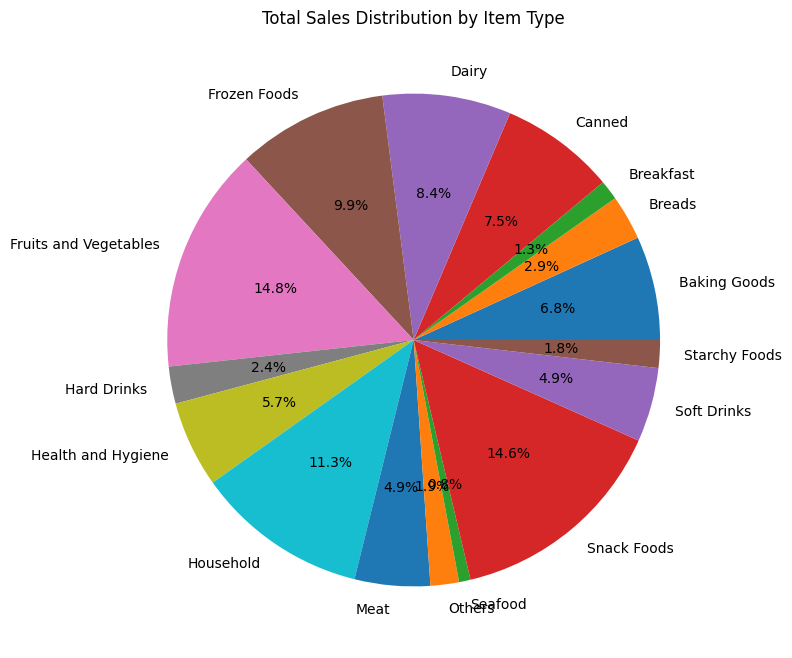

In [26]:
 plt.figure(figsize=(8,8))
 total_sales = data.groupby('Item Type').sum().reset_index()
 plt.pie(total_sales['Sales'], labels=total_sales['Item Type'],autopct='%1.1f%%')
 plt.title('Total Sales Distribution by Item Type')
 plt.show()  

## 4.4 Top outlets by sales

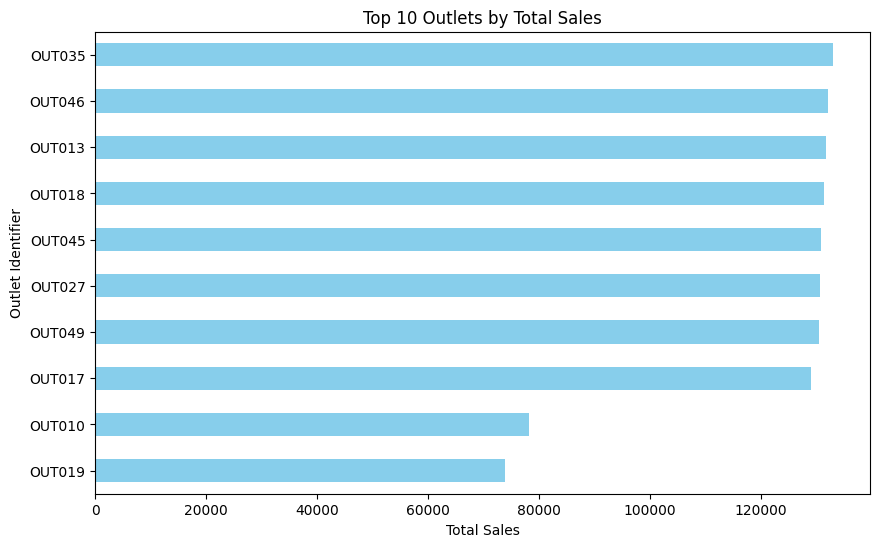

In [30]:
 
plt.figure(figsize=(10,6))
top_outlets = data.groupby('Outlet Identifier')['Sales'].sum().sort_values(ascending=False).head(10)
top_outlets.plot(kind='barh', color='skyblue')
plt.xlabel("Total Sales")
plt.ylabel("Outlet Identifier")
plt.title("Top 10 Outlets by Total Sales")
plt.gca().invert_yaxis() # to make the highest values appear at the top, not the bottom. 
plt.show() 